# Distancias y asociaciones

En este notebook, veremos ejemplos de cálculo de distancias y asociaciones con bibliotecas de Python.

## Cargando las bibliotecas

In [ ]:
# importa  pandas
import pandas as pd

# gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Escalonamento multidmensional
from sklearn.manifold import MDS

# transformacion de atributos
from category_encoders import OneHotEncoder, OrdinalEncoder

# cálculo de distancias
from scipy.spatial.distance import pdist, squareform

## Base de datos

Vamos a cargar una base de datos en la *National Health and Examination Survey*, una encuesta de muestra realizada por los *Centers of Disease Control and Preventions*, una agencia de vigilancia de la salud de EE. UU. Esta base de datos es una muestra de los registros de los años fiscales 2009/10 y 2011/12. Se puede encontrar una descripción del proceso de recolección, así como de otros años [aqui](https://wwwn.cdc.gov/nchs/nhanes/tutorials/default.aspx)

In [ ]:
#carga base de dtos
NHANES = pd.read_csv('https://raw.githubusercontent.com/ProjectMOSAIC/NHANES/master/data-raw/NHANES.csv',index_col='ID')

Vamos a explorar un pouco la base:

In [ ]:
# muestra aleatória

NHANES.sample(10)

,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,HHIncome,...,AgeFirstMarij,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation
ID,,,,,,,,,,,,,,,,,,,,,
62435,2011_12,female,0,0-9,7.0,White,White,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60828,2009_10,female,39,30-39,478.0,White,NaN,CollegeGrad,Married,more 99999,...,NaN,No,NaN,No,Yes,18.0,3.0,1.0,No,Heterosexual
59913,2009_10,female,28,20-29,340.0,White,NaN,CollegeGrad,Married,25000-34999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67178,2011_12,male,4,0-9,NaN,Mexican,Mexican,NaN,NaN,10000-14999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66697,2011_12,female,13,10-19,NaN,White,White,NaN,NaN,45000-54999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56323,2009_10,female,53,50-59,636.0,White,NaN,HighSchool,Married,55000-64999,...,NaN,No,NaN,No,Yes,19.0,1.0,1.0,No,Heterosexual
52450,2009_10,male,63,60-69,758.0,White,NaN,9_11thGrade,Married,25000-34999,...,NaN,NaN,NaN,No,Yes,13.0,30.0,NaN,No,NaN
71573,2011_12,female,11,10-19,NaN,White,White,NaN,NaN,more 99999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56060,2009_10,male,80,NaN,NaN,White,NaN,8thGrade,Widowed,45000-54999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Informaciones sobre los atributos

NHANES.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 55829 to 62881
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SurveyYr          10000 non-null  object 
 1   Gender            10000 non-null  object 
 2   Age               10000 non-null  int64  
 3   AgeDecade         9667 non-null   object 
 4   AgeMonths         4962 non-null   float64
 5   Race1             10000 non-null  object 
 6   Race3             5000 non-null   object 
 7   Education         7221 non-null   object 
 8   MaritalStatus     7231 non-null   object 
 9   HHIncome          9189 non-null   object 
 10  HHIncomeMid       9189 non-null   float64
 11  Poverty           9274 non-null   float64
 12  HomeRooms         9931 non-null   float64
 13  HomeOwn           9937 non-null   object 
 14  Work              7771 non-null   object 
 15  Weight            9922 non-null   float64
 16  Length            543 non-null    fl

In [ ]:
# descripcion de los atributos numéricos
NHANES.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,36.742100,22.397566,0.00,17.000,36.000,54.000,80.000
AgeMonths,4962.0,420.123942,259.043091,0.00,199.000,418.000,624.000,959.000
HHIncomeMid,9189.0,57206.170421,33020.276584,2500.00,30000.000,50000.000,87500.000,100000.000
Poverty,9274.0,2.801844,1.677909,0.00,1.240,2.700,4.710,5.000
HomeRooms,9931.0,6.248918,2.277538,1.00,5.000,6.000,8.000,13.000
Weight,9922.0,70.981798,29.125357,2.80,56.100,72.700,88.900,230.700
Length,543.0,85.016022,13.705026,47.10,75.700,87.000,96.100,112.200
HeadCirc,88.0,41.180682,2.311483,34.20,39.575,41.450,42.925,45.400
Height,9647.0,161.877838,20.186567,83.60,156.800,166.000,174.500,200.400
BMI,9634.0,26.660136,7.376579,12.88,21.580,25.980,30.890,81.250


In [ ]:
# descripcion de los atributos categóricos

NHANES.describe(include = 'object').T

,count,unique,top,freq
SurveyYr,10000,2,2009_10,5000
Gender,10000,2,female,5020
AgeDecade,9667,8,40-49,1398
Race1,10000,5,White,6372
Race3,5000,6,White,3135
Education,7221,5,SomeCollege,2267
MaritalStatus,7231,6,Married,3945
HHIncome,9189,12,more 99999,2220
HomeOwn,9937,3,Own,6425
Work,7771,3,Working,4613


Vamos a analisar los atributos categóricos, para clasificarlos entre discreto y ordinal

In [ ]:
for column_name in NHANES.select_dtypes(include=["object_"]):
  print(column_name, "->", NHANES[column_name].unique())
  print()

SurveyYr -> ['2009_10' '2011_12']

Gender -> ['female' 'male']

AgeDecade -> [' 20-29' ' 10-19' nan ' 0-9' ' 30-39' ' 60-69' ' 70+' ' 40-49' ' 50-59']

Race1 -> ['White' 'Other' 'Mexican' 'Hispanic' 'Black']

Race3 -> [nan 'Black' 'White' 'Mexican' 'Other' 'Hispanic' 'Asian']

Education -> ['CollegeGrad' nan '8thGrade' 'HighSchool' 'SomeCollege' '9_11thGrade']

MaritalStatus -> ['Married' nan 'NeverMarried' 'Divorced' 'Widowed' 'LivePartner'
 'Separated']

HHIncome -> ['more 99999' '75000-99999' '20000-24999' '45000-54999' '25000-34999'
 '15000-19999' '10000-14999' '65000-74999' nan '35000-44999' ' 5000-9999'
 '55000-64999' ' 0-4999']

HomeOwn -> ['Own' 'Rent' nan 'Other']

Work -> ['Working' nan 'NotWorking' 'Looking']

BMICatUnder20yrs -> [nan 'b_NormWeight' 'd_Obese' 'c_OverWeight' 'a_UnderWeight']

BMI_WHO -> ['18.5_to_24.9' '30.0_plus' nan '25.0_to_29.9' '12.0_18.5']

Diabetes -> ['No' 'Yes' nan]

HealthGen -> ['Vgood' 'Excellent' 'Poor' 'Good' nan 'Fair']

LittleInterest -> ['Non

Vamos a separar los atributos nominales y ordinales para hacer una transformacion a numérica, para calcular distancias:

In [ ]:
nominal =  ['SurveyYr', 'Gender', 'Race1', 'Race3', 'MaritalStatus', 'HomeOwn', 'Work',
       'Diabetes', 'SleepTrouble', 'PhysActive',  'Alcohol12PlusYr',
       'SmokeNow', 'Smoke100', 'Smoke100n', 'Marijuana',
       'RegularMarij', 'HardDrugs', 'SexEver', 'SameSex', 'SexOrientation']

ordinal = ['AgeDecade', 'Education', 'HHIncome', 'BMICatUnder20yrs', 'BMI_WHO', 'HealthGen',
           'LittleInterest', 'Depressed', 'TVHrsDay', 'CompHrsDay',]

Precisamos explicitar a ordem para os atributos ordinais, uma vez que a ordem em que eles aparacem pode ser diferente da ordem desejada:

In [ ]:
mappings = [
    {'col' : 'AgeDecade',
     'mapping' : {
         ' 0-9' : 0,
         ' 10-19' : 1,
         ' 20-29' : 2,
         ' 30-39' : 3,
         ' 40-49' : 4,
         ' 50-59' : 5,
         ' 60-69' : 6,
         ' 70+' : 7
     }
    },
    {'col' : 'Education',
     'mapping' : {
          '8thGrade' : 0,
          '9_11thGrade': 1,
          'HighSchool' : 2,
          'SomeCollege' : 3,
          'CollegeGrad' : 4
     }
    },
    {'col' : 'HHIncome',
     'mapping' : {
         ' 0-4999' : 0,
         ' 5000-9999' : 1,
         '10000-14999' : 2,
         '15000-19999' : 3,
         '20000-24999' : 4,
         '25000-34999' : 5,
         '25000-44999' : 6,
         '45000-54999' : 7,
         '55000-64999' : 8,
         '65000-74999' : 9,
         '75000-99999' : 10,
         'more 99999'  : 11
     }
    },
    {'col': 'BMICatUnder20yrs',
     'mapping' : {
         'a_UnderWeight' : 0,
         'b_NormWeight'  : 1,
         'c_OverWeight'  : 2,
         'd_Obese'       : 3
     }
    },
    {'col':'BMI_WHO',
     'mapping': {
        '12.0_18.5'    : 0,
        '18.5_to_24.9' : 1,
        '25.0_to_29.9' : 2,
        '30.0_plus'    : 3
     }
    },
    {'col' : 'HealthGen',
     'mapping' : {
         'Poor'      : 0,
         'Fair'      : 1,
         'Good'      : 2,
         'Vgood'     : 3,
         'Excellent' : 4
     }
    },
    {'col' : 'LittleInterest',
     'mapping' : {
         'None'    : 0,
         'Most'    : 1,
         'Several' : 2
     }
    },
    {'col' : 'Depressed',
     'mapping' : {
         'None'    : 0,
         'Most'    : 1,
         'Several' : 2
     }
    },
    {'col' : 'TVHrsDay',
     'mapping' : {
         '0_hrs'     : 0,
         '0_to_1_hr' : 1,
         '1_hr'      : 2,
         '2_hr'      : 3,
         '3_hr'      : 4,
         '4_hr'      : 5,
         'More_4_hr' : 6
     }
    },
    {'col' : 'CompHrsDay',
     'mapping' : {
         '0_hrs'     : 0,
         '0_to_1_hr' : 1,
         '1_hr'      : 2,
         '2_hr'      : 3,
         '3_hr'      : 4,
         '4_hr'      : 5,
         'More_4_hr' : 6
     }
    }
]

Ahora vamos a crear los objetos que hacen la transformación. Para los atributos nominales, utilizaremos la codificación 1 de m (One-Hot-Encoding). En cuanto a los atributos categóricos, usemos el orden creado anteriormente

In [ ]:
onehotenc = OneHotEncoder(cols = nominal)
ordinalenc = OrdinalEncoder(cols = ordinal, mapping = mappings)

Inicialmente, transformamos os atributos nominales:

In [ ]:
NHANES1 = onehotenc.fit_transform(NHANES)

In [ ]:
NHANES1.head()

,SurveyYr_1,SurveyYr_2,Gender_1,Gender_2,Age,AgeDecade,AgeMonths,Race1_1,Race1_2,Race1_3,...,SexAge,SexNumPartnLife,SexNumPartYear,SameSex_1,SameSex_2,SameSex_3,SexOrientation_1,SexOrientation_2,SexOrientation_3,SexOrientation_4
ID,,,,,,,,,,,,,,,,,,,,,
55829,1,0,1,0,28,20-29,343.0,1,0,0,...,13.0,20.0,1.0,1,0,0,1,0,0,0
57112,1,0,0,1,14,10-19,170.0,1,0,0,...,NaN,NaN,NaN,0,0,1,0,0,0,1
60232,1,0,0,1,80,NaN,NaN,1,0,0,...,NaN,NaN,NaN,0,0,1,0,0,0,1
59919,1,0,0,1,22,20-29,268.0,1,0,0,...,18.0,3.0,1.0,1,0,0,1,0,0,0
56351,1,0,0,1,1,0-9,16.0,1,0,0,...,NaN,NaN,NaN,0,0,1,0,0,0,1


Ahora aplicamos la transformacion de los ordinales:

In [ ]:
NHANES2 = ordinalenc.fit_transform(NHANES1)

In [ ]:
NHANES2

,SurveyYr_1,SurveyYr_2,Gender_1,Gender_2,Age,AgeDecade,AgeMonths,Race1_1,Race1_2,Race1_3,...,SexAge,SexNumPartnLife,SexNumPartYear,SameSex_1,SameSex_2,SameSex_3,SexOrientation_1,SexOrientation_2,SexOrientation_3,SexOrientation_4
ID,,,,,,,,,,,,,,,,,,,,,
55829,1,0,1,0,28,2.0,343.0,1,0,0,...,13.0,20.0,1.0,1,0,0,1,0,0,0
57112,1,0,0,1,14,1.0,170.0,1,0,0,...,NaN,NaN,NaN,0,0,1,0,0,0,1
60232,1,0,0,1,80,-1.0,NaN,1,0,0,...,NaN,NaN,NaN,0,0,1,0,0,0,1
59919,1,0,0,1,22,2.0,268.0,1,0,0,...,18.0,3.0,1.0,1,0,0,1,0,0,0
56351,1,0,0,1,1,0.0,16.0,1,0,0,...,NaN,NaN,NaN,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64065,0,1,0,1,46,4.0,NaN,1,0,0,...,17.0,7.0,1.0,1,0,0,1,0,0,0
66189,0,1,0,1,47,4.0,NaN,0,0,1,...,18.0,7.0,1.0,1,0,0,1,0,0,0
63714,0,1,0,1,48,4.0,NaN,1,0,0,...,17.0,4.0,1.0,1,0,0,1,0,0,0


Finalmente, un tratamento de valores ausentes

In [ ]:
NHANES3  = NHANES2.fillna(NHANES2.median())

Para acelerar los cálculos, tomemos una muestra aleatoria de esta versión procesada. Además, para que un atributo no tenga mayor importancia que los demás, cambiemos la escala para que todos tengan valores entre 0 y 1:

In [ ]:
sample = NHANES3.sample(1000)
max_age = max(sample.Age)
sample = (sample - sample.min())/(sample.max()-sample.min())

In [ ]:
sample.head()

,SurveyYr_1,SurveyYr_2,Gender_1,Gender_2,Age,AgeDecade,AgeMonths,Race1_1,Race1_2,Race1_3,...,SexAge,SexNumPartnLife,SexNumPartYear,SameSex_1,SameSex_2,SameSex_3,SexOrientation_1,SexOrientation_2,SexOrientation_3,SexOrientation_4
ID,,,,,,,,,,,,,,,,,,,,,
56037,1.0,0.0,0.0,1.0,0.0375,0.125,0.037539,1.0,0.0,0.0,...,0.228571,0.05,0.071429,0.0,0.0,1.0,0.0,0.0,0.0,1.0
60281,1.0,0.0,0.0,1.0,0.3000,0.375,0.307612,1.0,0.0,0.0,...,0.171429,0.08,0.071429,1.0,0.0,0.0,1.0,0.0,0.0,0.0
59679,1.0,0.0,1.0,0.0,0.2000,0.250,0.210636,1.0,0.0,0.0,...,0.228571,0.05,0.071429,0.0,0.0,1.0,0.0,0.0,0.0,1.0
62571,0.0,1.0,1.0,0.0,0.4000,0.500,0.435871,1.0,0.0,0.0,...,0.428571,0.07,0.071429,1.0,0.0,0.0,1.0,0.0,0.0,0.0
70935,0.0,1.0,1.0,0.0,0.5750,0.625,0.435871,0.0,0.0,0.0,...,0.228571,0.00,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0


Ahora, vamos a calcular la matriz de distancias



In [ ]:
dist = squareform(pdist(sample,'euclidean'))

In [ ]:
dist

array([[0.        , 3.77203961, 5.90849883, ..., 5.9677831 , 5.49532246,
        2.23789512],
       [3.77203961, 0.        , 4.63775506, ..., 5.71964962, 5.2096118 ,
        4.26552437],
       [5.90849883, 4.63775506, 0.        , ..., 5.03529385, 5.39478712,
        5.47581306],
       ...,
       [5.9677831 , 5.71964962, 5.03529385, ..., 0.        , 4.44469292,
        6.31373955],
       [5.49532246, 5.2096118 , 5.39478712, ..., 4.44469292, 0.        ,
        5.84002347],
       [2.23789512, 4.26552437, 5.47581306, ..., 6.31373955, 5.84002347,
        0.        ]])

Ahora vamos a crear un objeto Método que calcule el escalado multidimensional. Como ya hemos calculado la matriz de disimilitud, pasamos el argumento 'precalculado' (si no lo hacemos, el método calcula internamente la matriz de distancia euclidiana). La implementación utiliza un enfoque iterativo para minimizar la función de estrés. La opción detallada es para que sigamos la evolución de esta función.

In [ ]:
mds = MDS(dissimilarity='precomputed',verbose=2)

Una vez que se ha creado el objeto, podemos aplicarlo a la matriz de distancia, que calculamos anteriormente.

In [ ]:
transformed = mds.fit_transform(dist)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


it: 0, stress 10664862.662502471
it: 1, stress 2736076.464680352
it: 2, stress 2694619.425070373
it: 3, stress 2665933.7658114983
it: 4, stress 2642834.151188654
it: 5, stress 2622528.447127983
it: 6, stress 2603842.8159011924
it: 7, stress 2586165.2759080385
it: 8, stress 2568889.8784989365
it: 9, stress 2551712.830120916
it: 10, stress 2534346.0831298884
it: 11, stress 2516243.5561046577
it: 12, stress 2496701.625220831
it: 13, stress 2474947.5491363397
it: 14, stress 2450345.751423309
it: 15, stress 2422129.1456701057
it: 16, stress 2389701.8237490733
it: 17, stress 2352452.6507560504
it: 18, stress 2310545.9595230245
it: 19, stress 2263640.489331332
it: 20, stress 2211944.556915716
it: 21, stress 2155776.5722280233
it: 22, stress 2095316.8446910058
it: 23, stress 2031273.9783401715
it: 24, stress 1964552.0876462471
it: 25, stress 1897038.677659445
it: 26, stress 1831142.148564928
it: 27, stress 1768522.2297161906
it: 28, stress 1710771.7544818495
it: 29, stress 1657962.726154914
it

Para visualizar esta transformación, podemos hacer un diagrama de dispersión. Para ayudar a la interpretación, utilizaremos un código de colores basado en la edad de los individuos:

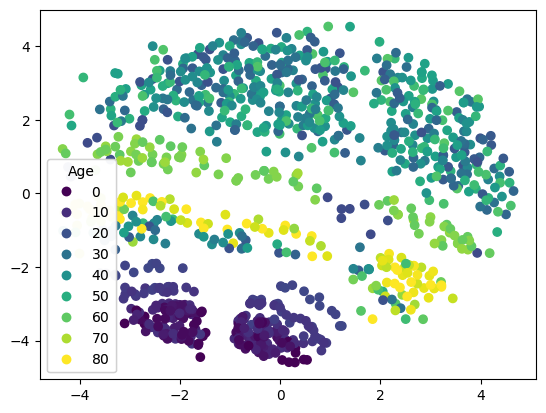

In [ ]:
fig, ax = plt.subplots()

scatter = ax.scatter(transformed[:,0],transformed[:,1], c=sample.Age*max_age)

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="Age")
ax.add_artist(legend)

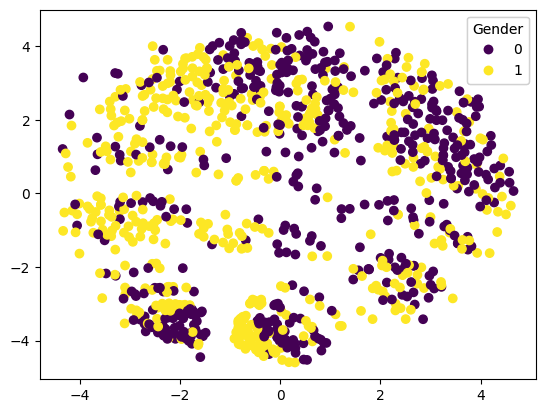

In [ ]:
fig, ax = plt.subplots()

scatter = ax.scatter(transformed[:,0],transformed[:,1], c=sample.Gender_1)

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="Gender")
ax.add_artist(legend)

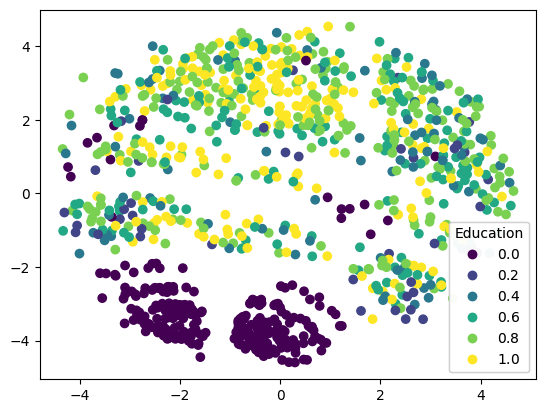

In [ ]:
fig, ax = plt.subplots()

scatter = ax.scatter(transformed[:,0],transformed[:,1], c=sample.Education)

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="Education")
ax.add_artist(legend)

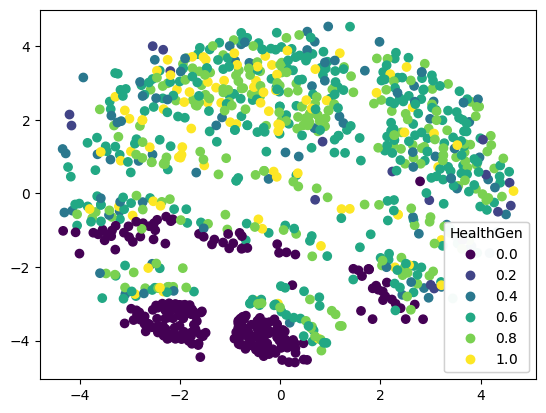

In [ ]:
fig, ax = plt.subplots()

scatter = ax.scatter(transformed[:,0],transformed[:,1], c=sample.HealthGen)

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="HealthGen")
ax.add_artist(legend)

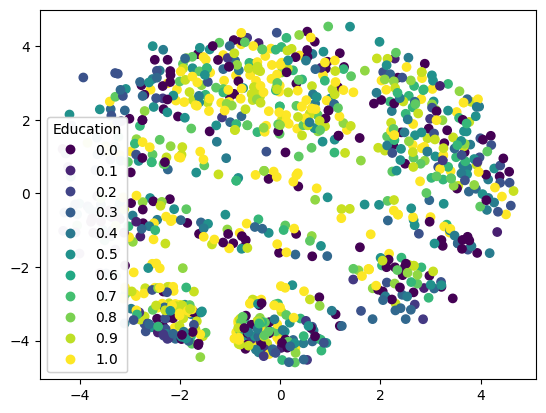

In [ ]:
fig, ax = plt.subplots()

scatter = ax.scatter(transformed[:,0],transformed[:,1], c=sample.HHIncome)

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="Education")
ax.add_artist(legend)

Ahora repitamos el proceso, usando otra métrica de distancia (cityblock)

In [ ]:
dist = squareform(pdist(sample,'cityblock'))
transformed = mds.fit_transform(dist)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


it: 0, stress 512256968.7768458
it: 1, stress 131940606.51856978
it: 2, stress 128826177.09069243
it: 3, stress 126386630.16458206
it: 4, stress 124382578.74700966
it: 5, stress 122714956.14718582
it: 6, stress 121267788.41416325
it: 7, stress 119988334.92674614
it: 8, stress 118845391.90924637
it: 9, stress 117800987.68127179
it: 10, stress 116812234.39268076
it: 11, stress 115843374.68540876
it: 12, stress 114872342.78366898
it: 13, stress 113885166.0044978
it: 14, stress 112828977.68396041
it: 15, stress 111631941.00696537
it: 16, stress 110229704.36205237
it: 17, stress 108551931.8766486
it: 18, stress 106511637.38477565
it: 19, stress 104012729.69267704
it: 20, stress 100926055.6087511
it: 21, stress 97148709.76763833
it: 22, stress 92622780.23214014
it: 23, stress 87373441.36501236
it: 24, stress 81559852.38974091
it: 25, stress 75512262.34735638
it: 26, stress 69559992.75743854
it: 27, stress 64017430.50470649
it: 28, stress 58995183.75911012
it: 29, stress 54537484.73280569
it:

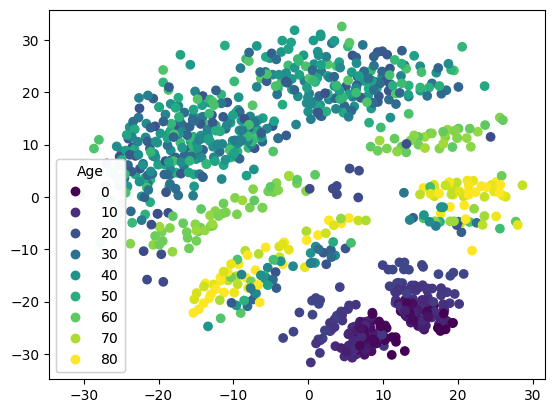

In [ ]:
fig, ax = plt.subplots()

scatter = ax.scatter(transformed[:,0],transformed[:,1], c=sample.Age*max_age)

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="Age")
ax.add_artist(legend)

## Asociaciones entre variables

Ahora investiguemos algunas asociaciones entre variables en esta base (usando la base original)

### Categórico X Categórico

In [ ]:
pd.crosstab(NHANES['SurveyYr'],NHANES['Gender'])

Gender,female,male
SurveyYr,,
2009_10,2525,2475
2011_12,2495,2505


In [ ]:
pd.crosstab(NHANES['Gender'],NHANES['AgeDecade'])

AgeDecade,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70+
Gender,,,,,,,,
female,653,684,681,677,681,623,480,348
male,738,690,675,661,717,681,439,239


In [ ]:
pd.crosstab(NHANES['Gender'],NHANES['Marijuana'])

Marijuana,No,Yes
Gender,,
female,1077,1270
male,972,1622


In [ ]:
pd.crosstab(NHANES['AgeDecade'],NHANES['TVHrsDay'])

TVHrsDay,0_hrs,0_to_1_hr,1_hr,2_hr,3_hr,4_hr,More_4_hr
AgeDecade,,,,,,,
0-9,9,95,155,172,78,39,38
10-19,11,84,138,210,125,56,64
20-29,23,106,136,177,103,55,72
30-39,17,109,133,187,82,52,51
40-49,11,101,119,195,108,56,80
50-59,9,88,123,165,119,93,93
60-69,11,34,50,109,112,64,85
70+,7,8,19,40,58,67,82


In [ ]:
pd.crosstab(NHANES['AgeDecade'],NHANES['SexOrientation'])

SexOrientation,Bisexual,Heterosexual,Homosexual
AgeDecade,,,
10-19,8,208,6
20-29,52,1091,17
30-39,24,1069,22
40-49,14,1174,18
50-59,21,1096,22


In [ ]:
pd.crosstab(NHANES['Depressed'],NHANES['SexOrientation'])

SexOrientation,Bisexual,Heterosexual,Homosexual
Depressed,,,
Most,27,271,10
None,66,3651,48
Several,26,710,27


In [ ]:
pd.crosstab(NHANES['Depressed'],NHANES['SexOrientation'],normalize=1)

SexOrientation,Bisexual,Heterosexual,Homosexual
Depressed,,,
Most,0.226891,0.058506,0.117647
None,0.554622,0.788212,0.564706
Several,0.218487,0.153282,0.317647


### Categórico X Numérico

In [ ]:
NHANES.groupby('Gender')['nPregnancies'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
female,2604.0,3.026882,1.795341,1.0,2.0,3.0,4.0,32.0
male,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
NHANES.groupby('Gender')['Height'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
female,4847.0,156.615865,16.791945,83.8,154.3,160.6,165.9,184.5
male,4800.0,167.191333,21.866307,83.6,166.2,173.8,179.4,200.4


In [ ]:
NHANES.groupby('Gender')['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
female,4841.0,26.772078,7.898886,12.88,21.24,25.56,31.2,81.25
male,4793.0,26.547073,6.807454,12.89,22.10,26.31,30.6,63.91


In [ ]:
NHANES.groupby('HHIncome')['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
HHIncome,,,,,,,,
0-4999,176.0,26.833807,8.820063,14.38,20.2000,25.90,31.0700,80.60
5000-9999,245.0,26.624245,8.617181,14.00,20.0200,26.10,31.7100,66.96
10000-14999,522.0,27.646724,8.240633,13.20,21.5575,26.95,32.2750,65.62
15000-19999,502.0,26.963227,8.117942,14.21,21.5775,25.70,31.6225,68.63
20000-24999,585.0,26.634188,7.826774,13.10,21.2000,25.76,31.2100,69.00
25000-34999,916.0,27.263439,7.665959,12.89,21.6925,26.77,32.0025,67.83
35000-44999,837.0,27.326559,7.986321,12.90,21.9200,26.50,31.7100,63.91
45000-54999,759.0,26.779407,7.580167,13.71,21.4500,25.73,31.0200,81.25
55000-64999,600.0,26.458517,6.710124,13.88,22.1000,26.00,30.5925,54.10


In [ ]:
NHANES.groupby('AgeDecade')['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
AgeDecade,,,,,,,,
0-9,1101.0,17.140845,3.012683,12.88,15.27,16.240,17.9500,33.60
10-19,1361.0,23.252961,6.027167,13.30,18.99,22.000,26.3000,55.07
20-29,1346.0,27.511553,6.950307,15.80,22.59,25.800,31.6000,80.60
30-39,1334.0,29.154243,6.968605,17.40,24.37,27.800,32.7375,69.00
40-49,1386.0,28.928492,6.461880,15.02,24.27,28.100,32.5075,65.62
50-59,1298.0,29.197735,6.582181,17.00,24.90,28.100,32.6000,81.25
60-69,908.0,29.592137,6.508981,15.22,25.29,28.385,32.9000,66.96
70+,577.0,29.242184,6.406284,16.60,24.78,28.370,32.1000,65.19


##  Numérico x Numérico

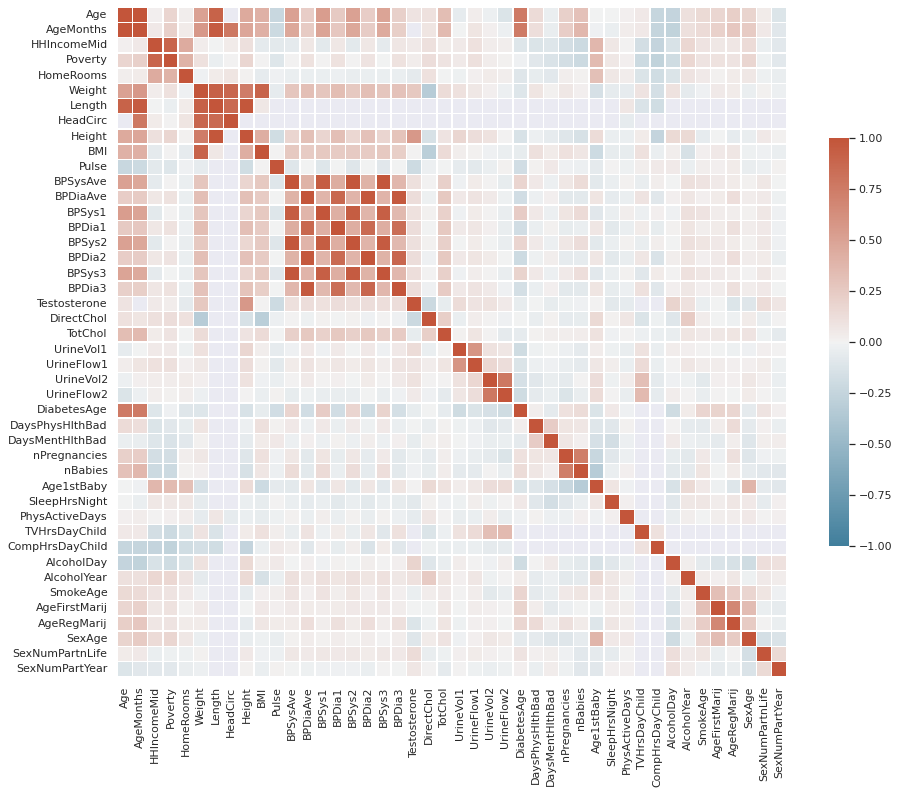

In [ ]:
corr=NHANES.corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.set(rc={'figure.figsize':(15,15)})

sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



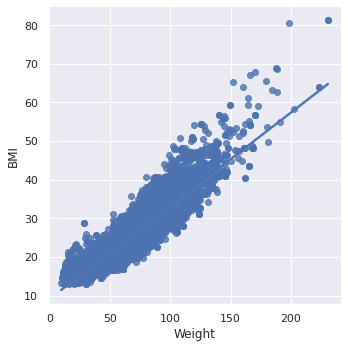

In [ ]:
sns.lmplot(data=NHANES,x='Weight',y='BMI')

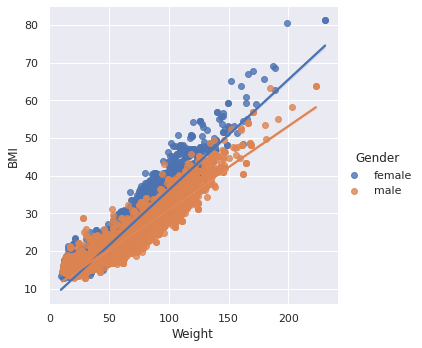

In [ ]:
sns.lmplot(data=NHANES,x='Weight',y='BMI',hue='Gender')

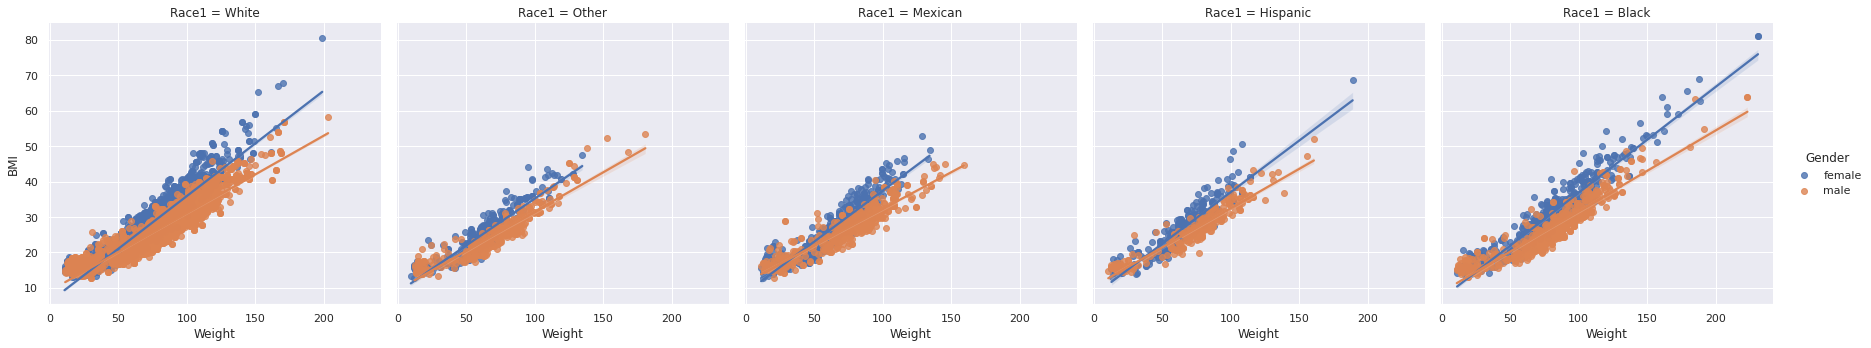

In [ ]:
sns.lmplot(data=NHANES,x='Weight',y='BMI',hue='Gender',col='Race1')

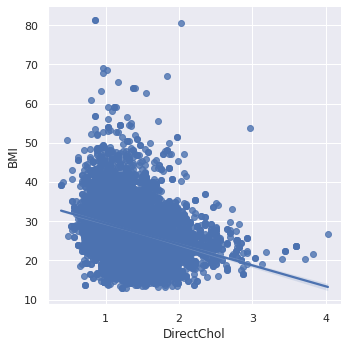

In [ ]:
sns.lmplot(data=NHANES,x='DirectChol',y='BMI')

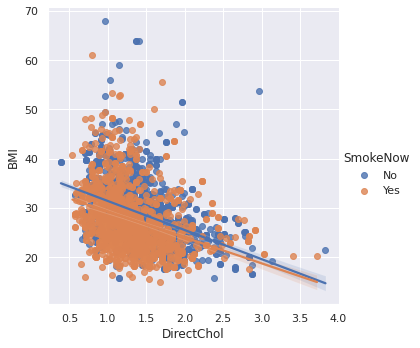

In [ ]:
sns.lmplot(data=NHANES,x='DirectChol',y='BMI',hue='SmokeNow')

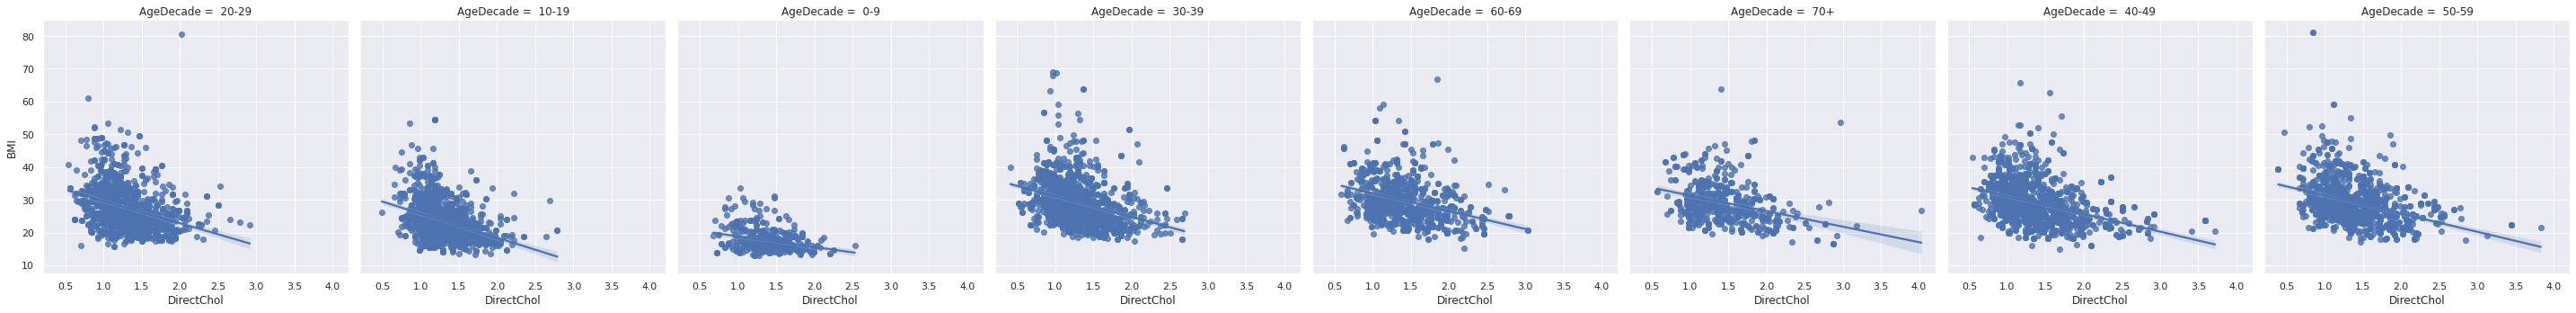

In [ ]:
sns.lmplot(data=NHANES,x='DirectChol',y='BMI',col='AgeDecade')

## La paradoja de Simpson

Para ilustrar la paradoja de Simpson, vamos a ilustrar el caso de las estadísticas de COVID en los primeros meses de contagio, comparando los países China e Italia. Este ejemplo se basa en [video](https://www.youtube.com/watch?v=t-Ci3FosqZs&t=135s). La siguiente base de datos contiene estadísticas de Italia al 9 de marzo de 2020 y China al 17 de febrero de 2020.

In [ ]:

covid = pd.read_csv('simpson.csv',index_col=0)

In [ ]:
covid

,Country,Date of reporting,Age group,Confirmed cases,Confirmed fatalities
0,China,17 February2020,0-9,416,0
1,China,17 February2020,10-19,549,1
2,China,17 February2020,20-29,3619,7
3,China,17 February2020,30-39,7600,18
4,China,17 February2020,40-49,8571,38
5,China,17 February2020,50-59,10008,130
6,China,17 February2020,60-69,8583,309
7,China,17 February2020,70-79,3918,312
8,China,17 February2020,80+,1408,208
9,Italy,9 March2020,0-9,43,0


Primero, calculemos las estadísticas agregadas:

In [ ]:
agrupado_pais = covid.groupby('Country').sum()

<ipython-input-31-94622ba3feaf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agrupado_pais = covid.groupby('Country').sum()


Calcule la tasa de mortalidad dividiendo el número de muertes por el número total de casos confirmados:

In [ ]:
agrupado_pais['Mortality (%)'] = agrupado_pais['Confirmed fatalities']/agrupado_pais['Confirmed cases']*100

In [ ]:
agrupado_pais

,Confirmed cases,Confirmed fatalities,Mortality (%)
Country,,,
China,44672,1023,2.290025
Italy,8026,357,4.448044


<Axes: xlabel='Country', ylabel='Mortality (%)'>

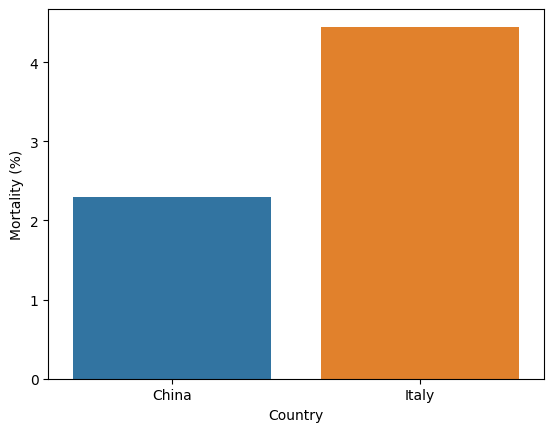

In [ ]:
sns.barplot(data=agrupado_pais,x=agrupado_pais.index,y='Mortality (%)')

Ahora calculemos la tasa de mortalidad por grupo de edad:

In [ ]:
covid['Mortality (%)'] = covid['Confirmed fatalities']/covid['Confirmed cases'] * 100

<Axes: xlabel='Age group', ylabel='Mortality (%)'>

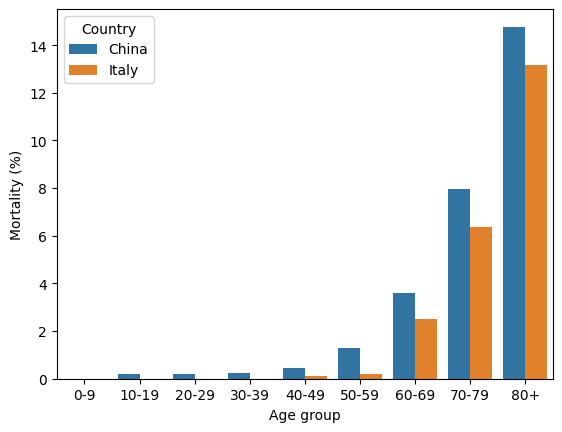

In [ ]:
sns.barplot(data=covid,x='Age group',y='Mortality (%)',hue='Country')

Este es un ejemplo de la paradoja de Simposon ya que, considerando los datos agregados, la tasa de mortalidad de Italia es más alta que la de China, pero considerando por grupos de edad, para todos los grupos de edad, la de China es más alta.

In [ ]:
cases_by_age_group = covid.groupby('Country').apply(lambda g: (g['Confirmed cases']/g['Confirmed cases'].sum())*100)
covid['Cases Age Group (%)'] = list(cases_by_age_group)

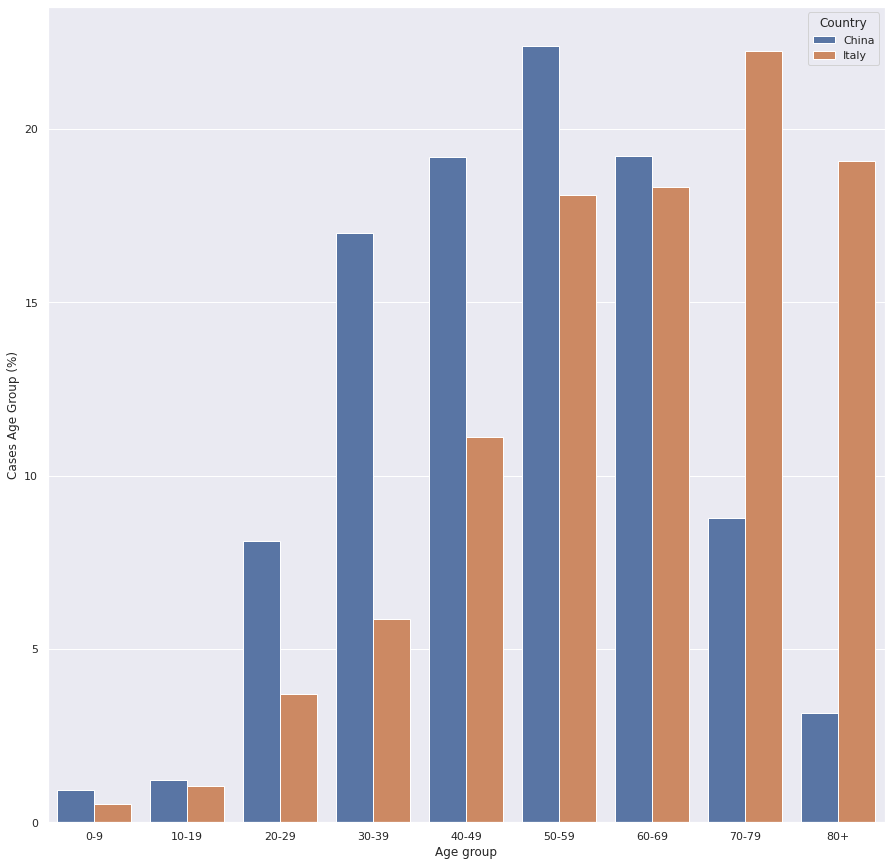

In [ ]:
sns.barplot(data=covid,x='Age group',y='Cases Age Group (%)',hue='Country')